# Exercise 3

Exercise 3 includes a **written assignment** (10 points), a **programming assignment with 3 problems** (9 points) and a **feedback/workload assessment assignment** (1 point). For each problem you need to modify the notebook by adding your own programming solutions or written text. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

### Due date

This exercise should be returned to your personal Github repository **within two weeks** after it has been released (by Thursday February 10th at 23:59). Please notice that finishing the programming exercises can take significant amount of time (especially if you don't have yet much programming experience). Hence, it is recommended that you start immediately working on them.

# Exercise 3 - Written assignment

In the *Sustainable cities and mobilities* and *Mobility analytics* lessons this week, we went through a few ideas related to how mobilities relates to sustainability and how it is possible to analyze observed spatial mobility analytically. 

## Spatial mobility and sustainability (10 points)

Write approximately 0.5-2 pages of text (A4) in English where you explain:
 
 - What kind of issues increased mobility causes related to sustainability? 
 - What kind of possible solutions there are that could help to solve or at least improve the situation related to current mobility crisis?
 - When analyzing mobility data, what challenges there exist related to the nature of the data? Are there any workarounds to overcome these challenges?
 - Do you consider (or have you considered) sustainability related issues regarding your own travel behavior? E.g. in terms of what mode of transport you use for daily travelling, or e.g. regarding the destinations where you travel for holiday?
 
Use the lesson materials and the recommended readings (optional) as a source of information for answering to these.

----------------

### My answer

*Hint: To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*

## Hints

- If you need help in Markdown formatting (e.g. how to add headings, bold, italics, links etc.), please take a look at this excellent [guide / cheatsheet](https://www.markdownguide.org/cheat-sheet/) 

# Exercise 3 - Programming assignment

In this exercise, we will practice movement data analysis and visualization. Our overall goal is to learn how to work with spatio-temporal data, and manipulate GPS observations obtained from Helsinki Region Transport showing the movements of public transport vehicles in Helsinki Region. The data was obtained from [HSL GTFS-RT feed](https://hsldevcom.github.io/gtfs_rt/) that provides information about the locations of the vehicles in real time. The frequency of observations in the raw data is 1 second. In this exercise, you will learn how to:

 - filter and resample the data (reduce the number of observations)
 - visualize the movement data with an animation
 - extract specific mobility characteristics from the data (e.g. statistics about average speed)

### Start your exercise in CSC Notebooks

Before you can start programming, you need to launch the CSC Notebook instance and clone your Exercise repository there.
If you need help with this, [read the documentation on the course site](https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/git-basics.html).
 
### Hints 

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 3 description](https://sustainability-gis.readthedocs.io/en/latest/lessons/L3/exercise-3.html). 

## Problem 1 - Prepare and filter data (4 points)

In this problem there are altogether 11 steps in which, we will prepare and filter the data both geographically and temporally. You should:

**GPS data**:
 1. read the GPS observations from the CSV file inside `helsinki_gtfs_rt.zip` file with pandas available from [this URL](https://gist.github.com/HTenkanen/0934ad916c17373fe3221d61ed190f59/raw/8ac39455a054ab2be125aaea50244bd8fe123b28/helsinki_gtfs_rt.zip). Notice that [you can read the data directly from the zipfile](https://stackoverflow.com/a/32993553) without needing to extract it.
    
 2. create a "geometry" column with Point geometries based on `lat` and `lon` columns
 3. convert the pandas DataFrame into GeoDataFrame having WGS84 as the coordinate reference system
 4. create a DateTime index for the GeoDataFrame based on the `timestamp` column
 
**Helsinki Region boundaries**:

 5. read the boundaries of Helsinki Region using `pyrosm`
 6. extract the total extent (bounding box) of the region into a single geometry and make a GeoDataFrame out of it
 
**Filter data geographically**:

 7. Select all observations that intersect with the Helsinki Region bounding box 
 8. Answer to following questions (use programming to find the answers):
   - When was the first observation recorded?
   - When was the last observation recorded?
   - On which weekday has the data been recorded? (e.g. Monday, Tuesday etc.)
 

Unable to revert mtime: /opt/conda/fonts


<AxesSubplot:>

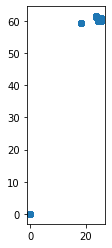

In [7]:
import pandas as pd
import geopandas as gpd
from pyrosm import OSM, get_data
from shapely.geometry import Polygon

# URL to data file
url = "https://gist.github.com/HTenkanen/0934ad916c17373fe3221d61ed190f59/raw/8ac39455a054ab2be125aaea50244bd8fe123b28/helsinki_gtfs_rt.zip"

# YOUR CODE HERE
# 1. read the GPS observations from the CSV file inside helsinki_gtfs_rt.zip file with 
# pandas available from this URL. Notice that you can read the data directly from the zipfile without 
# needing to extract it.
gps_obs = pd.read_csv(url)

# 2. create a "geometry" column with Point geometries based on lat and lon columns
gps_obs["geometry"] = gpd.points_from_xy(x=gps_obs["lon"], y=gps_obs["lat"])

# 3. convert the pandas DataFrame into GeoDataFrame having WGS84 as the coordinate reference system
gps_gdf = gpd.GeoDataFrame(data=gps_obs, geometry="geometry", crs=4326)

# 4. create a DateTime index for the GeoDataFrame based on the timestamp column
gps_gdf["time"] = pd.to_datetime(gps_gdf["timestamp"], format='%Y/%m/%d %H:%M:%S')
gps_gdf = gps_gdf.set_index("time")

# Helsinki Region boundaries:
# TODO: 5. read the boundaries of Helsinki Region using pyrosm
osm = OSM(get_data("helsinki_region_pbf"))
hb = osm.get_boundaries()

# TODO: 6. extract the total extent (bounding box) of the region into a single geometry and make a 
# GeoDataFrame out of it
tb = hb.total_bounds
min_x = tb[0]
max_x = tb[2]
min_y = tb[1]
max_y = tb[3]
bbox_geom = Polygon([(min_x,max_y),(max_x,max_y),(max_x,min_y),(min_x,min_y)])
bbox = gpd.GeoDataFrame(index=[0], geometry=[bbox_geom], crs=4326)
ax = bbox.plot(facecolor="none", edgecolor="blue")
hb.plot(ax=ax, facecolor="none", edgecolor="red")

# Filter data geographically:
# TODO: 7. Select all observations that intersect with the Helsinki Region bounding box


# TODO: 8. Answer to following questions (use programming to find the answers):


# When was the first observation recorded?


# When was the last observation recorded?


# On which weekday has the data been recorded? (e.g. Monday, Tuesday etc.)



**Filter data temporally**:

 9. Make an interactive histogram from the GPS data that shows the number of observations per minute. As a result, you should get something like this:
 
![Temporal profile before filter](img/HSL_temporal_profile_before_filter.PNG)


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

10. Based on the information from the histogram find out (by exploring the interactive visualization):
    - when was the first moment in time (minute) when there were more than 14 thousand (14000) observations per minute? --> write it down in following format `"YYYY-MM-DD HH:MM"`
    - when was the last moment in time (minute) when there were more than 14 thousand (14000) observations per minute? --> write it down in following format `"YYYY-MM-DD HH:MM"`
    
11. Based on the start and end time that you found out in the previous step, select the observations that are between the given moments in time. Visualize the selected data with a histogram. As a result you should have something like this:
 
![Temporal profile after filter](img/HSL_temporal_profile_after_filter.PNG)
    

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 2 - Create an animation based on the movements (3 points)

In this problem, the idea is to reduce the number of observations by resampling our data (i.e. only keeping record every 10 seconds) and create an animation out of our data. For doing this, you should:

1. Group the GPS observations that you selected and filtered in the previous problem based on `vehicle_id` and `direction_id` using the `groupby()` -function of pandas.
2. Iterate over the groups and **for each group**:
  - Resample the observations in a way that only one observation per 10 seconds is kept (i.e. reducing the number of observations). You can do this by chaining the following commands together: 
    1. Resample the group using `.resample()` -function of pandas with 10 second threshold. This returns a set of samples where observations within 10 seconds are grouped together. 
    2. From the output of the previous step, keep only the first observation of each sample using the `.first()` -function of pandas. This will reduce the number of observations so that only 1 observation per 10 seconds is kept.
  - Store the resulting sample GeoDataFrame into a list `sampled`
  - **Hint / Good programming practice:** *When programming something like this, where functionality should be implemented inside a loop, it is highly useful to use `break` command as the last intended line in the loop. This will stop the loop after the first iteration, and it is easier (and faster) to investigate what is happening inside the loop by checking the variable values. ([see examples here](https://www.pythontutorial.net/python-basics/python-break/))*
3. Combine all the GeoDataFrames stored in `sampled` list into a single GeoDataFrame (check [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html))
4. Drop all empty geometries from the combined GeoDataFrame
5. Make a copy of the combined GeoDataFrame and store it into a new variable `visualization_data`, and
  - Reset the index of the GeoDataFrame and drop the column `time` (i.e. the DateTime information)
  - Select only following columns from the combined GeoDataFrame `"geometry", "speed", "timestamp", "direction_id", "vehicle_id", "route_id"`
7. Create an animation based on the `visualization_data` with KeplerGl following the example that was shown during the lesson. The output animation could look something like [following](https://sustainability-gis-2021.github.io/examples/Helsinki_PT_Trajectories.html) (be patient, it takes a moment to load the visualization) in which the speed is used as source for coloring the points.

In [ ]:
# Container for resampled GeoDataFrames
sampled =  []

# YOUR CODE HERE
raise NotImplementedError()

8. Save the animation as an HTML file into the `docs` directory and name the file as `index.html`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 3 - Trajectory data mining - Mobility characteristics (2 points) 

In this problem, the idea is to continue working with our resampled data and calculate some basic movement characteristics based on our data (as was introduced in tutorial 3). For doing this, you should:

1. Group the sampled GeoDataFrame (from problem 2 having 10 second intervals) based on `direction_id` and `vehicle_id`
2. Iterate over the groups and on each iteration:
  - Create a trajectory collection out of the group if the maximum speed of the observations is larger than 0 (reported as meters per second)
  - Split the trajectory based on criteria that if there is a 5-minute time gap between observations, the trajectory should be splitted into multiple ones. Use the `mpd.ObservationGapSplitter()` functionality to do this (find information from the movingpandas docs).
  - Calculate the speed for each of these trajectories as **kilometers per hour** and select only observations where the speed is at least 1 kmph
  - Calculate the average and standard deviation of the speed (in kmph)
  - Create a LineString geometry out of the observations
  - Parse other useful information from the trajectory (should be a single value): vehicle_id, route_id, direction_id and start_time (i.e. what was the first timestamp of the trajectory).
  - Store each trajectory as a GeoDataFrame into `results` list
3. Merge all the individual GeoDataFrames stored in the `results` list representing individual trajectories
4. Plot the trajectories. As a result you should have something like following:

![HSL trajectories](img/HSL_trajectories.PNG)

5. Based on the trajectory data, answer to following questions:
  - What is the average speed of all the trajectories in our data?
  - What is the maximum speed of all the trajectories in our data?
  - What is the total length of all trajectories in our data? (in kilometers)
  - (optional validation for you): if you plot the histogram of the average speeds, you should get something like following:
  
![HSL avg speeds histogram](img/HSL_average_speeds.PNG)
  
   
6. Plot the trajectories and use the average speed as the column for defining the colors. If you compare the visualization to following map, can you detect some similarities or differences? 

![HSL trajectories](img/HSL_zones.jpg)

In [ ]:
# Container for the resulting trajectory GeoDataFrames
results = []

# YOUR CODE HERE
raise NotImplementedError()

## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise? *__Hint:__ To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*


I spent approximately this many hours: **X hours**

In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

**My feedback:**